<a href="https://colab.research.google.com/github/hlasko/Data-Science/blob/main/Google_Trends_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Trends API for Python

## In this tutorial, I will demonstrate how to use the Google Trends API for getting the current trending topics on the internet.


![alt text](https://cdn-images-1.medium.com/max/1200/1*Fi6masemXJT3Q8YWekQCDQ.png)

# Introduction

[Google trends](https://trends.google.com/trends/?geo=US) is a website that analyzes and lists the popular search results on Google search based on various regions and languages. Google Trends is Google's website (obviously). With the help of this tutorial, you can get the trending results and many more from google trends website using python. You don't need to manually search and copy the trending results, the Python API called `pytrends` does the job for you. Before getting started, I want all of you guys to go through the official documentation of the `pytrends` API.

[pytrends API](https://pypi.org/project/pytrends/)



---

# Installation

The first step is to install the library manually. So, open your favorite IDE or notebook start typing the following code. I will use [Google Colab](https://colab.research.google.com/) because it's my favorite notebook.



> If you are using jupyter notebook, just type the code as it is (make sure you have '!' at the beginning)


In [1]:
!pip install pytrends

Or, if you are using an IDE, just type the following code



In [2]:
pip install pytrends

After executing the above code you should get a successful message as shown above



---



# Implementation

## Connecting to Google

You must connect to Google first because after all, we are requesting the Google trending topics from Google Trends. For this, we need to import the method called `TrendReq` from `pytrends.request` library. Also, I will import the pandas library to store and visualize the data which you see in the later tutorial.

In [3]:
import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq()



---



## Interest By Region

Let us see the terms which are popular in the region worldwide. I will choose, the term to be searched as "Taylor Swift" (I like her so….).

In [6]:
pytrend.build_payload(kw_list=['Holownia'])
# Interest by Region
df = pytrend.interest_by_region()
#df.head(10)

**Now you might be thinking what are the values, what do they denote?**

The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term. Source → [Google Trends](https://support.google.com/trends/answer/4355212)..

Let us plot the result on a bar graph because sometimes visual representation gives a clear picture.

<Axes: xlabel='geoName'>

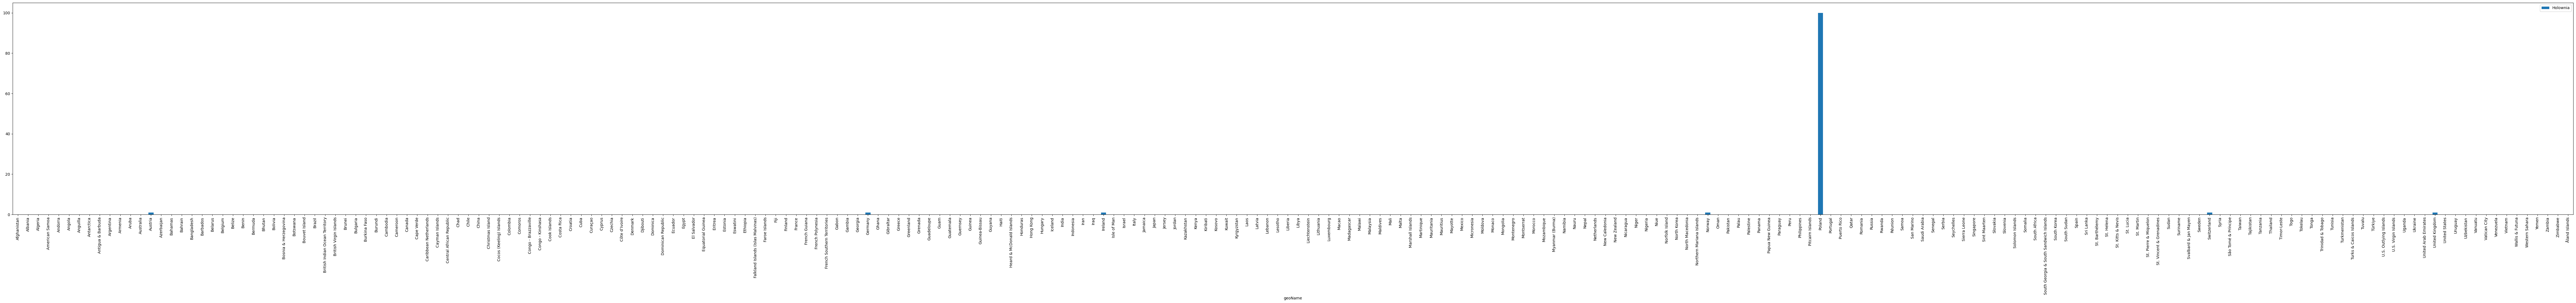

In [8]:
df.reset_index().plot(x='geoName', y='Holownia', figsize=(120, 10), kind ='bar')

Also, you use the parameter `resolution = 'COUNTRY_NAME'` to filter the results.



---



## Daily Search Trends

Now let us get the top daily search trends worldwide. To do this we have to use the `trending_searches()` method. If you want to search worldwide just don't pass any parameter.

In [10]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='poland')
df.head()

,0
0,Śląsk Wrocław
1,PlayStation Network
2,Raków Częstochowa – GKS Katowice
3,Hurkacz
4,Fame


Make sure you enter the country name in lowercase `pn = "canada"` . Also, you can compare the above results with the [google trend's result](https://trends.google.com/trends/trendingsearches/daily?geo=US). To get today's trending topics just use:

In [11]:
df = pytrend.today_searches(pn='PL')



---



## Top Charts

Let us see what was trending in 2019. With the help of `top_charts` method we can get the top trending searches yearly.

In [14]:
# Get Google Top Charts
df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='GLOBAL')
df.head()

ResponseError: The request failed: Google returned a response with code 404

To compare the results just visit [Google Trends](https://trends.google.com/trends/yis/2019/GLOBAL/). We can specify the year and the country that we want to see the trending searches.



---



## Google Keyword Suggestions

Let us see how can we obtain google's keyword suggestion. If you don't know what I'm talking about. The below image explains things more clear.

![alt text](https://cdn-images-1.medium.com/max/1200/1*QRpWWBS1SHXBr71Jp1NwQA.png)

In [15]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='Mercedes Benz')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Mercedes-Benz,Car make
1,Mercedes-Benz C-Class,Luxury car
2,Mercedes-Benz Sprinter,Van
3,Mercedes-Benz S-Class,Luxury
4,Mercedes-Benz Vito,Car model




---



## Related Queries

It's a common thing that when a user searches for a topic, they would also search for something related. These are called related queries. Let us see what are the related queries for the topic "***Coronavirus***". Always remember when you want to change the topic name just run the following code again with the new name as the parameter.

In [ ]:
pytrend.build_payload(kw_list=['Coronavirus'])

Now let's run the method `related_queries` which returns a dictionary full of related queries for the topic ***Coronavirus***

In [ ]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                       query  value
0                     virus    100
1         virus coronavirus     95
2                    corona     92
3         china coronavirus     87
4                     china     86
5      coronavirus symptoms     83
6          news coronavirus     72
7              corona virus     61
8        coronavirus update     53
9        coronavirus italia     50
10           el coronavirus     37
11          coronavirus map     34
12        wuhan coronavirus     33
13                    wuhan     33
14        coronavirus death     31
15      what is coronavirus     31
16        coronavirus cases     30
17          coronavirus usa     30
18     sintomas coronavirus     30
19           uk coronavirus     23
20           us coronavirus     23
21  symptoms of coronavirus     22
22       coronavirus latest     20
23         coronavirus live     20
24     coronavirus in china     20, 'rising':                          query   value
0            wuhan 

Similarly, you can also search for the related topics just run the below code to do so:

In [ ]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':      value  ...            topic_type
0   175600  ...         City in China
1    47900  ...        Italian region
2    27350  ...           Cooperative
3    26650  ...        Italian region
4    18550  ...                 Topic
5    17800  ...        Italian region
6    17600  ...               Website
7    15150  ...                 Topic
8    13550  ...        Italian region
9    12450  ...                Animal
10   11000  ...                 Topic
11   10500  ...                 Topic
12    9950  ...      Water navigation
13    9400  ...                 Topic
14    2800  ...       Spoken language
15    2400  ...          Ethnic group
16    2250  ...  Country in East Asia
17    2100  ...     Country in Europe
18    1050  ...                 Topic
19     500  ...                 Topic

[20 rows x 6 columns], 'top':     value  ...            topic_type
0     100  ...                 Virus
1       8  ...                 Topic
2       5  ...  Country in East Asia



---



This is the end of the tutorial, I hope you guys have learned a thing or two. If you guys have any doubts regarding the tutorial let me know via the comment section. Although this is a short tutorial there is a lot to learn. Alright see you in my next tutorial, have a good day!!!